# Business Case: OLA(Ensemble Learning)

- Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

- As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

- Therefore, identifying the key factors contributing to driver attrition and developing predictive models to foresee and address potential departures is imperative for sustaining growth and competitive advantage.

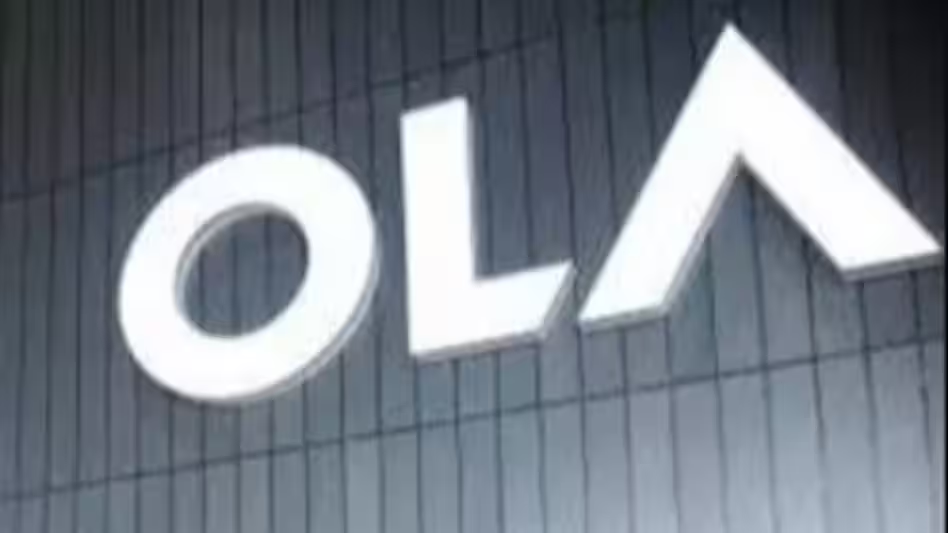

### Objective:

- The objective of this analysis is to develop a predictive model to determine the likelihood of a driver leaving Ola based on various attributes. The data provided encompasses monthly information for a segment of drivers for the years 2019 and 2020, including:

    - Demographics: City, age, gender, etc.
    - Tenure Information: Joining date, last date.
    - Performance History: Quarterly ratings, monthly business acquired, grade, income.

## Dataset Information:

#### Source:
Please check the dataset at: "[Dataset Link](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv)"

#### Feature Information:
- **MMMM-YY :** Reporting Date (Monthly)
- **Driver_ID :** Unique id for drivers
- **Age :** Age of the driver
- **Gender :** Gender of the driver – Male : 0, Female: 1
- **City :** City Code of the driver
- **Education_Level :** Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
- **Income :** Monthly average Income of the driver
- **Date Of Joining :** Joining date for the driver
- **LastWorkingDate :** Last date of working for the driver
- **Joining Designation :** Designation of the driver at the time of joining
- **Grade :** Grade of the driver at the time of reporting
- **Total Business Value :** The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
- **Quarterly Rating :** Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

## Loading the "ola_driver.csv" Dataset:
For exploring and analysing first we import the Python libraries like numpy,pandas,matplotlib,Seaborn,Scipy and then import the "ola_driver.csv" dataset and save it in a dataframe "df".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
# import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

import time

In [2]:
df = pd.read_csv("ola_driver.csv")

In [3]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


# Basic Exploration of Data

In [4]:
# getting the shape of the dataframe

df.shape

(19104, 14)

In [5]:
# getting the columns of the dataframe

df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [6]:
# dropping the column 'Unnamed: 0'

df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [7]:
# getting the data types of columns

df.dtypes

MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

In [8]:
# changing the dtypes of some features to datetime

df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

In [9]:
# getting the number of unique values in each column

df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [10]:
# getting the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [11]:
# Checking for duplicate records

df.duplicated().sum()

0

In [12]:
# Checking for percentage of missing values

100 * df.isnull().sum()/len(df)

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

- There are missing values found in AGE, Gender.
- LastWorkingDate feature contains a lot of missing values which indicates the driver has not left the company yet.

# KNN Imputation

In [13]:
num_cols = df.select_dtypes(np.number)

num_cols.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [14]:
num_cols.drop(["Driver_ID"], axis = 1, inplace = True)

In [15]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(num_cols)
df_new = imputer.transform(num_cols)

In [16]:
data = pd.DataFrame(df_new)

In [17]:
data.columns = num_cols.columns

In [18]:
data.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

- We have successfully imputed the missing values using KNNImputer.

### Concatenating the dataframes:

In [19]:
columns = list(set(df.columns).difference(set(num_cols)))

columns

['City', 'MMM-YY', 'LastWorkingDate', 'Driver_ID', 'Dateofjoining']

In [20]:
new_df = pd.concat([data, df[columns]], axis=1)

new_df.shape

(19104, 13)

In [21]:
new_df.head(10)

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,MMM-YY,LastWorkingDate,Driver_ID,Dateofjoining
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,C23,2019-01-01,NaT,1,2018-12-24
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,C23,2019-02-01,NaT,1,2018-12-24
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,C23,2019-03-01,2019-03-11,1,2018-12-24
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,2020-11-01,NaT,2,2020-11-06
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,2020-12-01,NaT,2,2020-11-06
5,43.0,0.0,2.0,65603.0,2.0,2.0,0.0,1.0,C13,2019-12-01,NaT,4,2019-12-07
6,43.0,0.0,2.0,65603.0,2.0,2.0,0.0,1.0,C13,2020-01-01,NaT,4,2019-12-07
7,43.0,0.0,2.0,65603.0,2.0,2.0,0.0,1.0,C13,2020-02-01,NaT,4,2019-12-07
8,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,C13,2020-03-01,NaT,4,2019-12-07
9,43.0,0.0,2.0,65603.0,2.0,2.0,0.0,1.0,C13,2020-04-01,2020-04-27,4,2019-12-07


In [22]:
new_df.nunique()

Age                        70
Gender                      6
Education_Level             3
Income                   2383
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
City                       29
MMM-YY                     24
LastWorkingDate           493
Driver_ID                2381
Dateofjoining             869
dtype: int64

# Data Preprocessing

In [23]:
agg_functions = {
    "Age": "max",
    "Gender": "first",
    "Education_Level": "last",
    "Income": "last",
    "Joining Designation": "last",
    "Grade": "last",
    "Total Business Value": "sum",
    "Quarterly Rating": "last",
    "LastWorkingDate": "last",
    "City": "first",
    "Dateofjoining": "last"
}

grouped_df = new_df.groupby(["Driver_ID", "MMM-YY"]).agg(agg_functions).sort_index(ascending = [True, True])

grouped_df.head()

Age  Gender  Education_Level   Income  \
Driver_ID MMM-YY                                               
1         2019-01-01  28.0     0.0              2.0  57387.0   
          2019-02-01  28.0     0.0              2.0  57387.0   
          2019-03-01  28.0     0.0              2.0  57387.0   
2         2020-11-01  31.0     0.0              2.0  67016.0   
          2020-12-01  31.0     0.0              2.0  67016.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1         2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2         2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   

                      Quarterly Rating LastWorkingDate City Dateofjoining  
Driver_ID MMM-YY                                                           
1         2019-01-01               2.0             NaT  C23    2018-12-24  
          2019-02-01               2.0             NaT  C23    2018-12-24  
          2019-03-01               2.0      2019-03-11  C23    2018-12-24  
2         2020-11-01               1.0             NaT   C7    2020-11-06  
          2020-12-01               1.0             NaT   C7    2020-11-06

In [24]:
df_final = pd.DataFrame()

In [25]:
df_final["Driver_ID"] = new_df["Driver_ID"].unique()

In [26]:
df_final['Age'] = list(grouped_df.groupby('Driver_ID',axis=0).max('MMM-YY')['Age'])
df_final['Gender'] = list(grouped_df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
df_final['City'] = list(grouped_df.groupby('Driver_ID').agg({'City':'last'})['City'])
df_final['Education'] = list(grouped_df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
df_final['Income'] = list(grouped_df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
df_final['Joining_Designation'] = list(grouped_df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
df_final['Grade'] = list(grouped_df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
df_final['Total_Business_Value'] = list(grouped_df.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])
df_final['Last_Quarterly_Rating'] = list(grouped_df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

In [27]:
df_final.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0


In [28]:
df_final.shape

(2381, 10)

# Feature Engineering

### Creating a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

In [29]:
first_quarter = grouped_df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "first"})

last_quarter = grouped_df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "last"})

qr = (last_quarter["Quarterly Rating"] > first_quarter["Quarterly Rating"]).reset_index()

driver_id = qr[qr["Quarterly Rating"] == True]["Driver_ID"]

qr_list = []
for i in df_final["Driver_ID"]:
    if i in driver_id.values:
        qr_list.append(1)
    else:
        qr_list.append(0)


df_final["Quarterly_Rating_Increased"] = qr_list

In [30]:
df_final.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1


### Target variable creation: Creating a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

In [31]:
last_work_day = (grouped_df.groupby(["Driver_ID"]).agg({"LastWorkingDate": "last"})["LastWorkingDate"].isna()).reset_index()

driver_id = last_work_day[last_work_day["LastWorkingDate"] == True]["Driver_ID"]
target = []

for i in df_final["Driver_ID"]:
    if i in driver_id.values:
        target.append(0)
    else:
        target.append(1)
        
df_final["target"] = target

In [32]:
df_final.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,target
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0


### Creating a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [33]:
mrf = grouped_df.groupby(["Driver_ID"]).agg({"Income": "first"})

mrl = grouped_df.groupby(["Driver_ID"]).agg({"Income": "last"})

mr = (mrl["Income"] > mrf["Income"]).reset_index()

driver_id = mr[mr["Income"] == True]["Driver_ID"]
income = []
for i in df_final["Driver_ID"]:
    if i in driver_id.values:
        income.append(1)
    else:
        income.append(0)
        
df_final["Salary_Increased"] = income

In [34]:
df_final.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,target,Salary_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,0


In [35]:
df_final["Salary_Increased"].value_counts(normalize=True)

0    0.98194
1    0.01806
Name: Salary_Increased, dtype: float64

- Around 1.8% drivers income have been increased which is very less.

# Exploratory Data Analysis

## Statistical Summary:

In [36]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.377018e+01,5.933265e+00,21.0,30.0,33.0,37.0,58.0
Gender,2381.0,4.105838e-01,4.914963e-01,0.0,0.0,0.0,1.0,1.0
Education,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Joining_Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total_Business_Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Last_Quarterly_Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.0,1.0,2.0,4.0
Quarterly_Rating_Increased,2381.0,1.503570e-01,3.574961e-01,0.0,0.0,0.0,0.0,1.0


- There are total of 2381 different drivers data.
- Age of drivers range from 21years to 58years.
- 75% drivers monthly income is <= 75986.
- 75% drivers acquired 4173650 as total business values.

In [37]:
df_final.describe(include = 'object')

,City
count,2381
unique,29
top,C20
freq,152


- Majority of drivers are coming from C20 city.

## Univariate Analysis:

In [38]:
df_final["target"].value_counts()

1    1616
0     765
Name: target, dtype: int64

- Out of 2381 drivers 1616 have left the company.

In [39]:
cols = ['Gender','Education','Joining_Designation','Grade','Last_Quarterly_Rating','Quarterly_Rating_Increased']

for i in cols:
    print("------------------------------------------------------------")
    print(df_final[i].value_counts(normalize=True) * 100)

------------------------------------------------------------
0.0    58.798824
1.0    40.949181
0.6     0.125997
0.2     0.083998
0.4     0.041999
Name: Gender, dtype: float64
------------------------------------------------------------
2.0    33.683326
1.0    33.389332
0.0    32.927341
Name: Education, dtype: float64
------------------------------------------------------------
1.0    43.091138
2.0    34.229315
3.0    20.705586
4.0     1.511970
5.0     0.461991
Name: Joining_Designation, dtype: float64
------------------------------------------------------------
2.0    35.909282
1.0    31.121378
3.0    26.165477
4.0     5.795884
5.0     1.007980
Name: Grade, dtype: float64
------------------------------------------------------------
1.0    73.246535
2.0    15.203696
3.0     7.055859
4.0     4.493910
Name: Last_Quarterly_Rating, dtype: float64
------------------------------------------------------------
0    84.964301
1    15.035699
Name: Quarterly_Rating_Increased, dtype: float64


- 58% of drivers are male while female constitutes around 40%.
- 33% of drivers have completed graduation and 33% of drivers have completed 12+ education.
- 43% of drivers have 1 as joining_designation.
- Around 36% of drivers graded as 2.
- Around 73% of drivers rated as 1 on last quarter.
- Only 15% of drivers rating has been increased on quarterly.

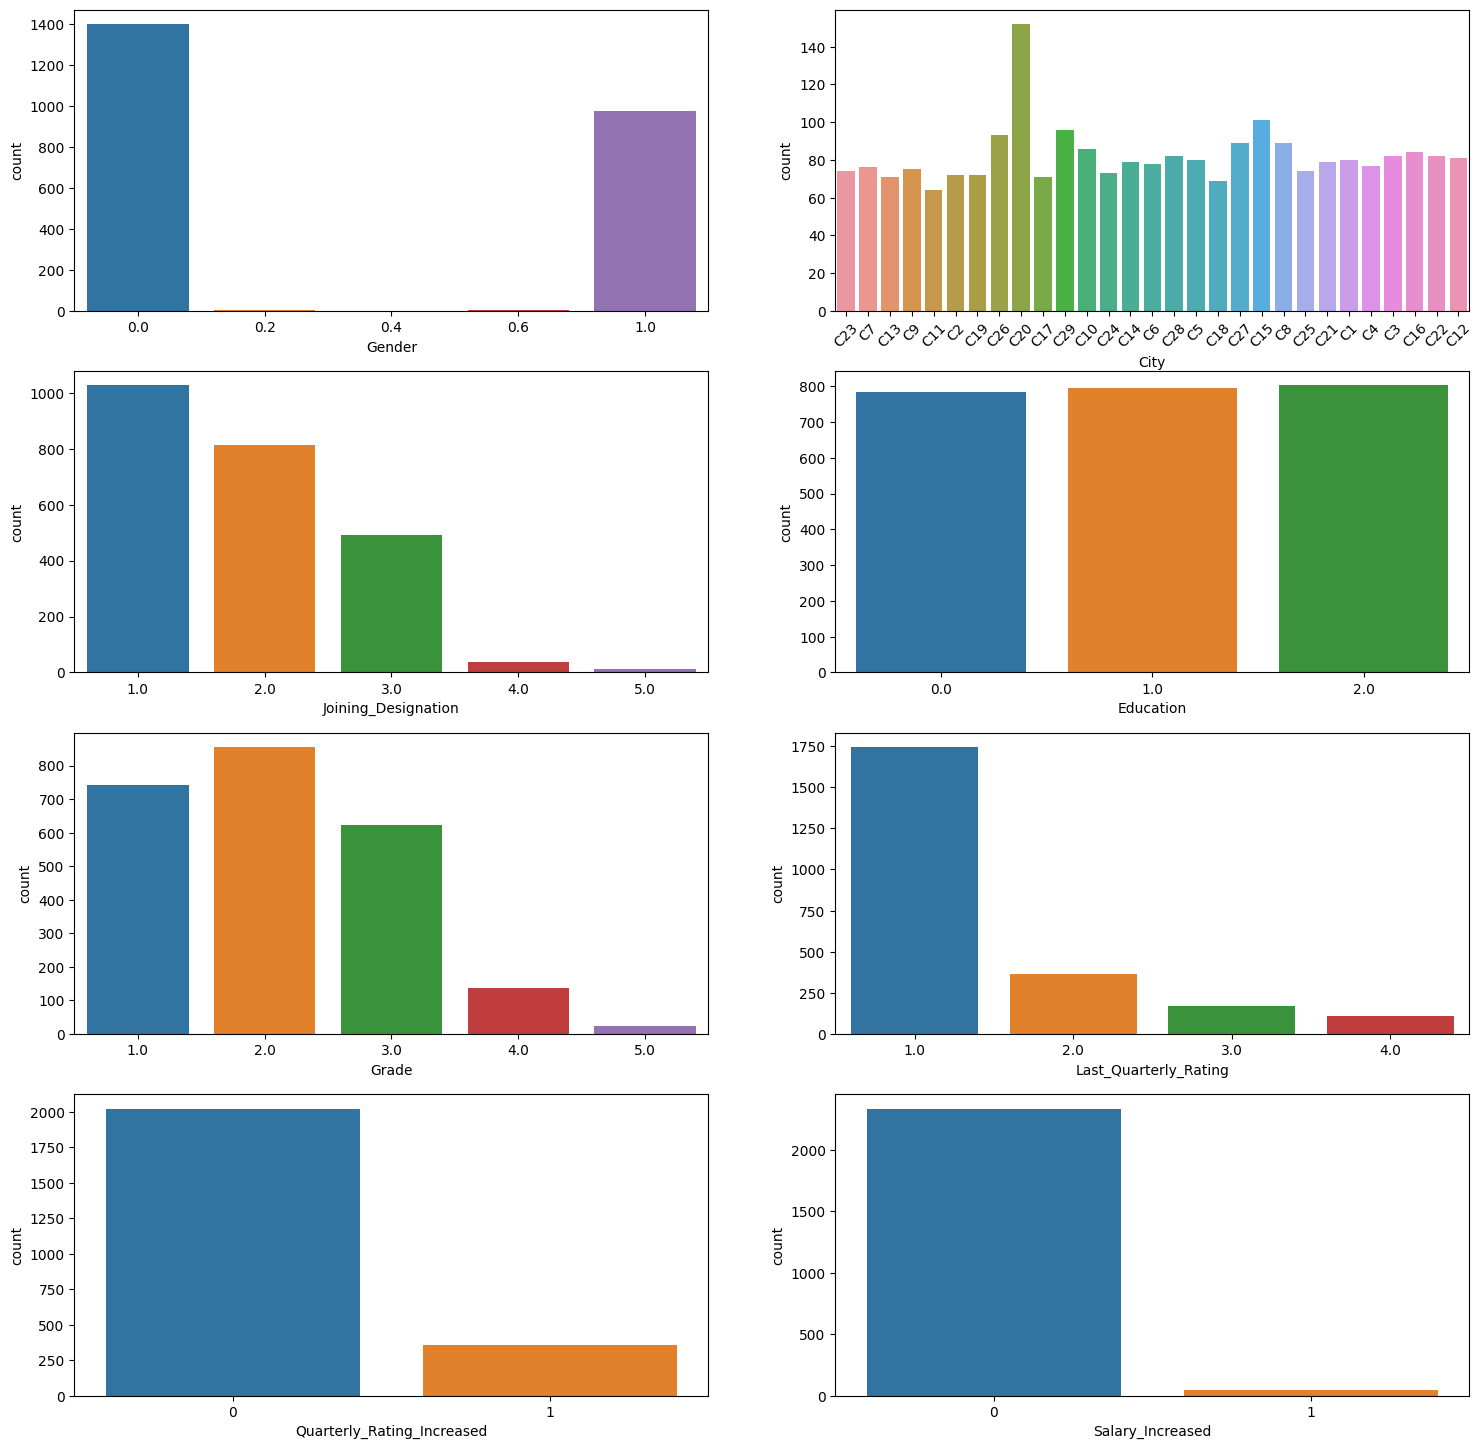

In [40]:
plt.figure(figsize=(18, 18))

plt.subplot(421)
sns.countplot(data=df_final, x="Gender")

plt.subplot(422)
sns.countplot(data=df_final, x="City")
plt.xticks(rotation= 45)

plt.subplot(423)
sns.countplot(data=df_final, x="Joining_Designation")

plt.subplot(424)
sns.countplot(data=df_final, x="Education")

plt.subplot(425)
sns.countplot(data=df_final, x="Grade")

plt.subplot(426)
sns.countplot(data=df_final, x="Last_Quarterly_Rating")

plt.subplot(427)
sns.countplot(data=df_final, x="Quarterly_Rating_Increased")

plt.subplot(428)
sns.countplot(data=df_final, x="Salary_Increased")

plt.show()

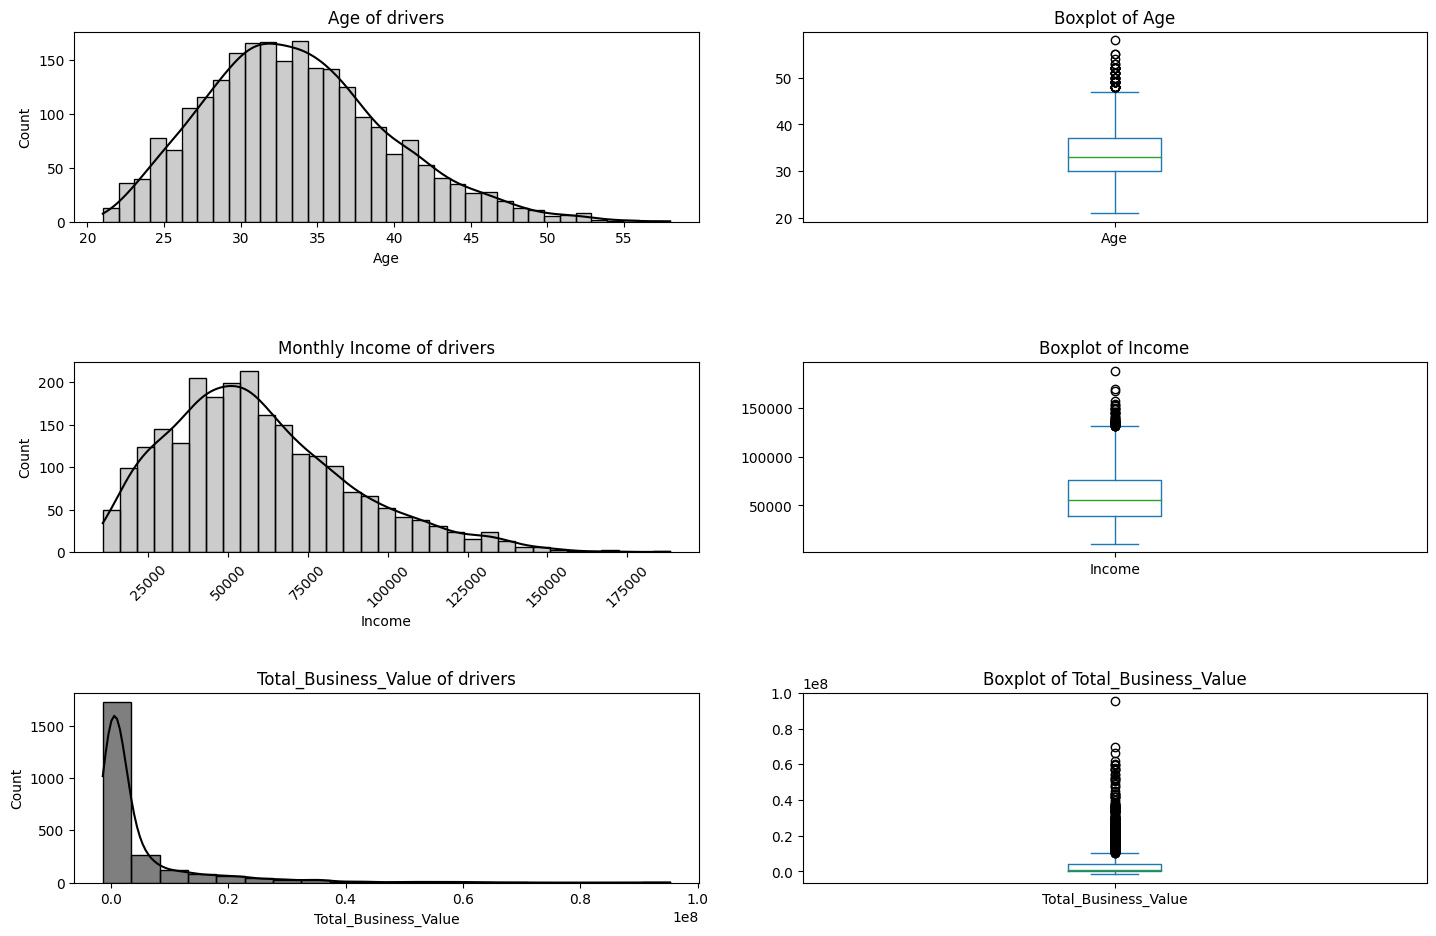

In [41]:
plt.subplots(figsize=(15,10))

plt.subplot(321)
sns.histplot(df_final['Age'],color='black', alpha=0.2, kde=True)
plt.title("Age of drivers")

plt.subplot(322)
df_final['Age'].plot.box(title='Boxplot of Age')
plt.tight_layout(pad=3)

plt.subplot(323)
sns.histplot(df_final['Income'],color='black', alpha=0.2, kde=True)
plt.title("Monthly Income of drivers")
plt.xticks(rotation = 45)

plt.subplot(324)
df_final['Income'].plot.box(title='Boxplot of Income')
plt.tight_layout(pad=3)

plt.subplot(325)
sns.histplot(df_final['Total_Business_Value'],color='black', kde=True, bins=20)
plt.title("Total_Business_Value of drivers")

plt.subplot(326)
df_final['Total_Business_Value'].plot.box(title='Boxplot of Total_Business_Value')
plt.tight_layout(pad=3)

plt.show()

- The distribution of age slightly skewed on right which might indicate the outliers in the data.
- The distribution of monthly income skewed on right which might indicate the outliers in the data.
- The distribution of total business value highly skewed on right which might indicate the outliers in the data.

## Bivariate Analysis:

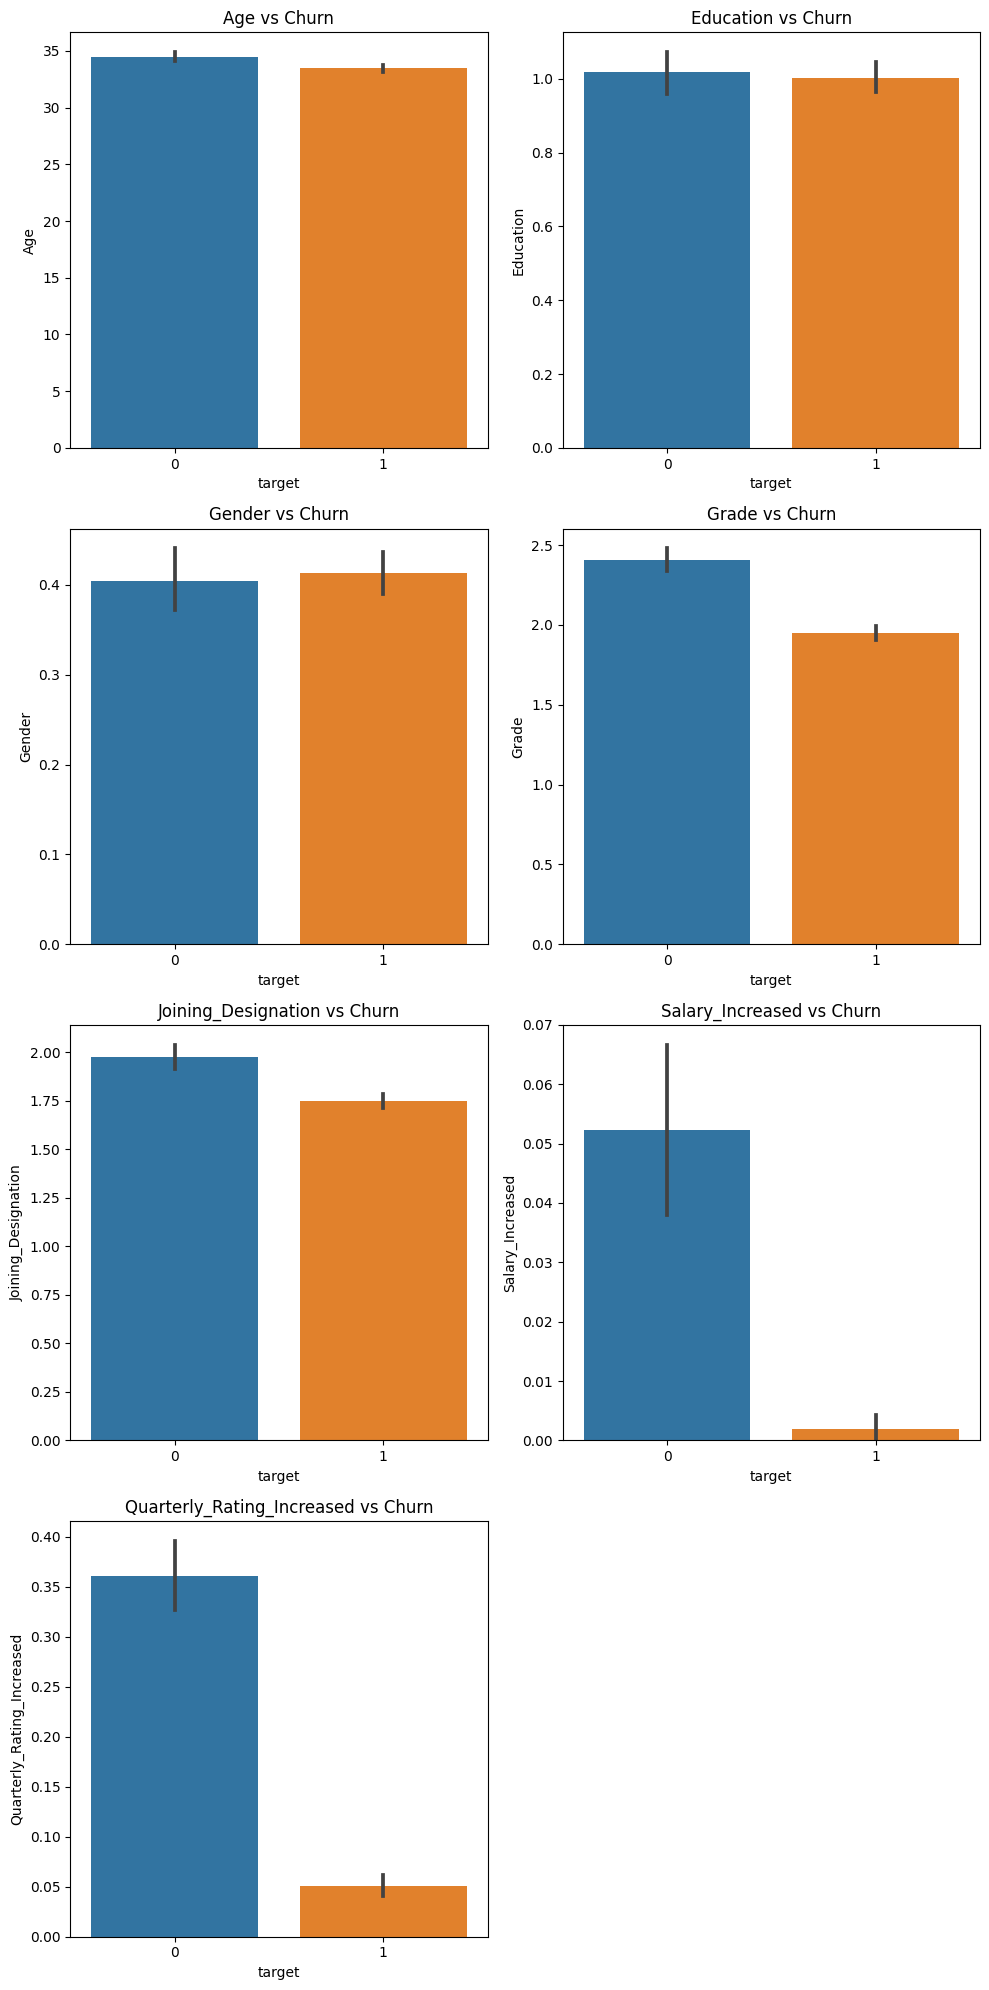

In [42]:
plt.figure(figsize=(10,20))

plt.subplot(421)
sns.barplot(data=df_final, x="target", y="Age")
plt.title("Age vs Churn")

plt.subplot(422)
sns.barplot(data=df_final, x="target", y="Education")
plt.title("Education vs Churn")

plt.subplot(423)
sns.barplot(data=df_final, x="target", y="Gender")
plt.title("Gender vs Churn")

plt.subplot(424)
sns.barplot(data=df_final, x="target", y="Grade")
plt.title("Grade vs Churn")

plt.subplot(425)
sns.barplot(data=df_final, x="target", y="Joining_Designation")
plt.title("Joining_Designation vs Churn")

plt.subplot(426)
sns.barplot(data=df_final, x="target", y="Salary_Increased")
plt.title("Salary_Increased vs Churn")

plt.subplot(427)
sns.barplot(data=df_final, x="target", y="Quarterly_Rating_Increased")
plt.title("Quarterly_Rating_Increased vs Churn")

plt.tight_layout()

- The proportion of Age, gender and education is more or less the same for both the employees who left the organization and those who did not leave.
- The employees who have their grade greater than 2 at the time of joining are less likely to leave the organization.
- The employees whose quarterly rating has increased are less likely to leave the organization.
- The employees whose monthly salary has not increased are more likely to leave the organization.

## Correlation Analysis:

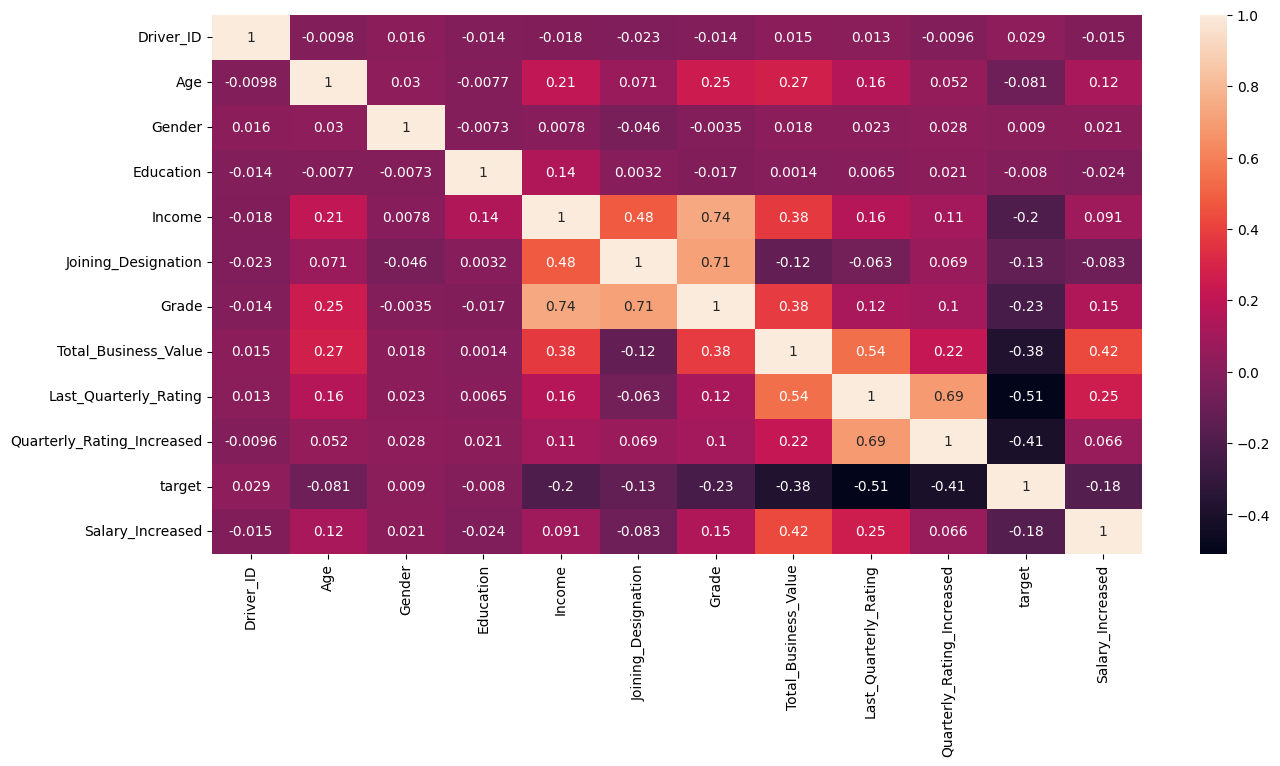

In [43]:
plt.figure(figsize=(15, 7))

sns.heatmap(df_final.corr(method="pearson"), annot=True)
plt.show()

- Income and Grade & Joining Designation and Grade are highly correlated.
- Total Business value and salary increament is correlated.

# One_hot Encoding

As there is only one categorical value in our dataset, We will use one hot encoder to convert it to numerical.

In [44]:
df_encoded = pd.get_dummies(df_final, columns=['City'],drop_first=True)

In [45]:
df_encoded.head()

,Driver_ID,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,...,0,0,0,0,0,0,0,0,0,0


# Train & Test Split:

In [46]:
from sklearn.model_selection import train_test_split

y = df_encoded["target"]
X = df_encoded.drop(['target', 'Driver_ID'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [47]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1904, 38)
X_test Shape:  (477, 38)
y_train Shape:  (1904,)
y_test Shape:  (477,)


# Standardization:

In [48]:
# Standardization of training data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


X_train_scaled

array([[0.56756757, 0.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.16216216, 0.6       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54054054, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21621622, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10810811, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31351351, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Model Building

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Baseline Models: 

In [50]:
valid1 = cross_val_score(LogisticRegression(),X,y,cv=5)
print('Logistic Regression:',valid1.round(2))
print('Mean:',valid1.mean())

valid2 = cross_val_score( DecisionTreeClassifier(),X,y,cv=5)
print('Decision Tree:',valid2.round(3))
print('Mean:',valid2.mean())

valid3 = cross_val_score(RandomForestClassifier(),X,y,cv=5)
print('RandomForestClassifier():',valid3.round(2))
print('Mean:',valid3.mean())

valid4 = cross_val_score(GradientBoostingClassifier(),X,y,cv=5)
print('GradientBoostingClassifier:',valid4.round(3))
print('Mean:',valid4.mean())

valid5 =cross_val_score(XGBClassifier(),X,y,cv=5)
print('XGBoostClassifier:',valid1.round(2))
print('Mean:',valid5.mean())

Logistic Regression: [0.73 0.76 0.75 0.74 0.77]
Mean: 0.7501136303578034
Decision Tree: [0.721 0.744 0.723 0.742 0.756]
Mean: 0.7370919436957173
RandomForestClassifier(): [0.8  0.78 0.79 0.79 0.84]
Mean: 0.8005047301939643
GradientBoostingClassifier: [0.797 0.819 0.79  0.803 0.838]
Mean: 0.8093291404612157
XGBoostClassifier: [0.73 0.76 0.75 0.74 0.77]
Mean: 0.7891654775117594


## MACHINE LEARNING MODELS

### WITHOUT THE TREATMENT OF CLASS IMBALANCE

In [51]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize = (15, 5))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt.show()

## Ensemble Learning: Bagging

### Random Forest Classifier:

In [52]:
# param_grid = { 
#     'n_estimators':list(range(10,100,10)),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [2,3,4],
#     'criterion' :['gini', 'entropy']
# }

In [53]:
# from sklearn.model_selection import GridSearchCV

# model = RandomForestClassifier()
# clf = GridSearchCV(model, param_grid, cv=5, scoring='recall')
# clf.fit(X_train_scaled, y_train)

In [54]:
# clf.best_params_

In [55]:
rf_clf1 = RandomForestClassifier(criterion='gini', max_depth=4, max_features='log2', n_estimators=10)
rf_clf1.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=10)

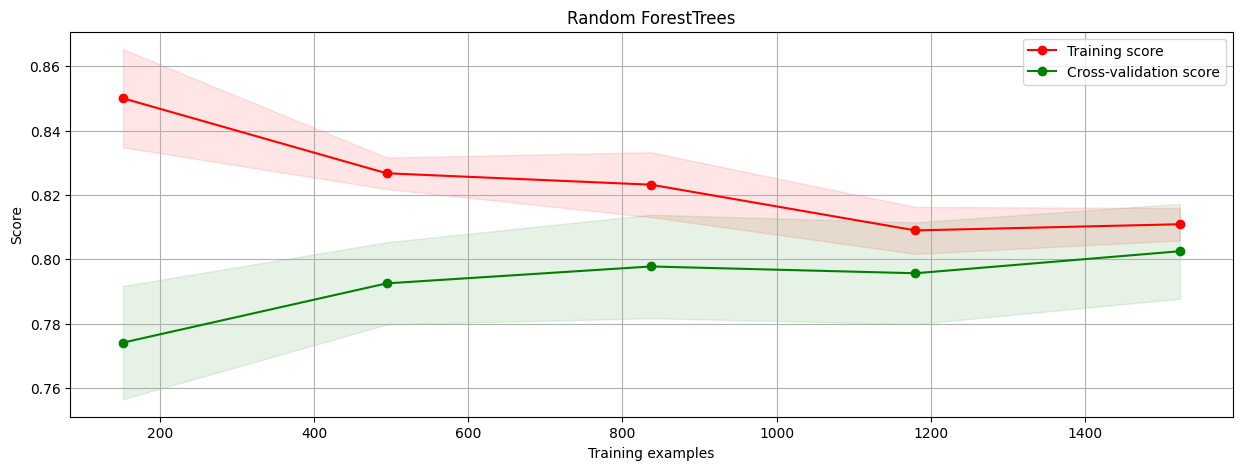

In [56]:
plot_learning_curve(rf_clf1, X_train_scaled, y_train, "Random ForestTrees")

In [57]:
y_pred = rf_clf1.predict(X_test_scaled)
proba = rf_clf1.predict_proba(X_test_scaled)[:,1]
print("Train data accuracy:",rf_clf1.score(X_train_scaled, y_train))
print("Test data accuracy:",rf_clf1.score(X_test_scaled,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*60)
print(classification_report(y_test, y_pred))
print('-'*60)

cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Metrix')
print(confusion_matrix(y_test, y_pred))

Train data accuracy: 0.7725840336134454
Test data accuracy: 0.7777777777777778
Accuracy of the model: 0.7777777777777778
ROC-AUC score test dataset:  0.7713690133902901
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.37      0.51       148
           1       0.77      0.96      0.86       329

    accuracy                           0.78       477
   macro avg       0.79      0.67      0.68       477
weighted avg       0.78      0.78      0.75       477

------------------------------------------------------------
Confusion Metrix
[[ 55  93]
 [ 13 316]]


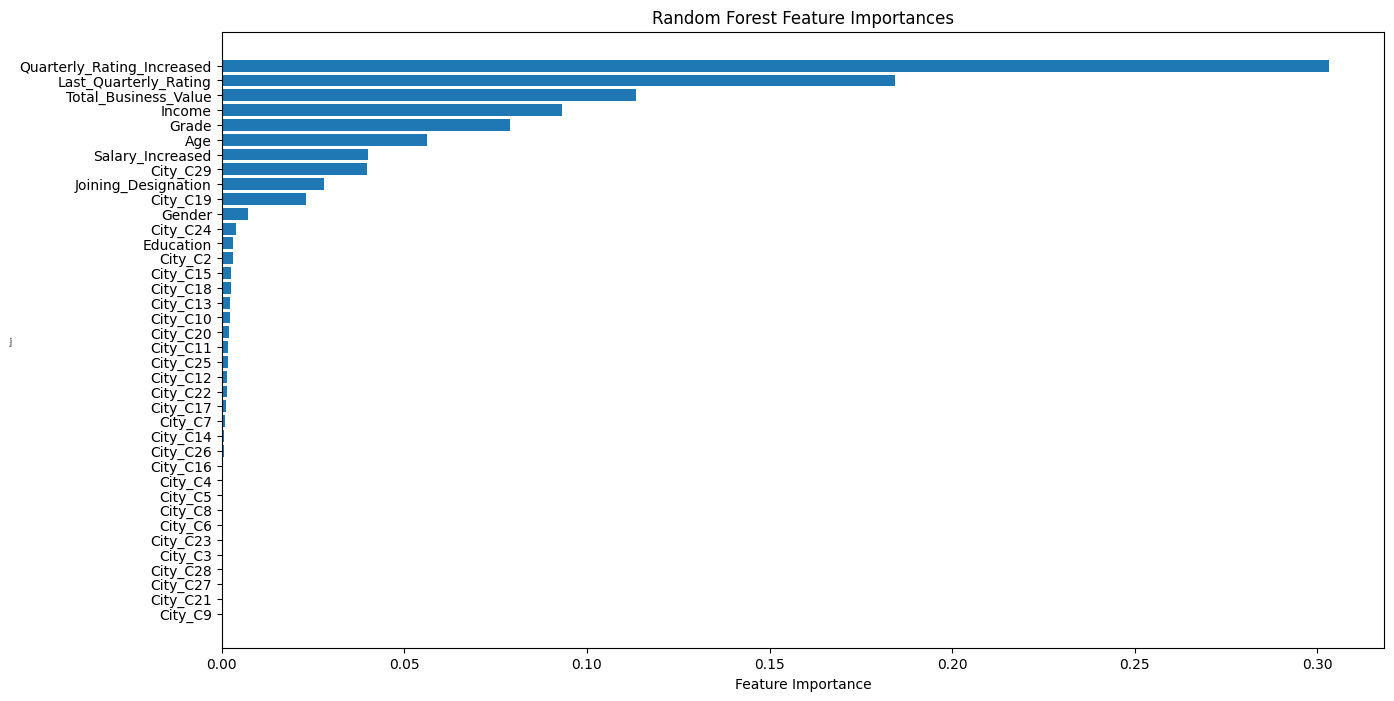

In [58]:
# feature importance
rf_clf1_imp1 = rf_clf1.feature_importances_

feature_names = [X_train.columns[i] for i in range(X_train_scaled.shape[1])]

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_clf1_imp1})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature', size = 2)
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

## Ensemble Learning: Boosting

### Gradient Boosting Classifier:

In [59]:
# param_grid = {
#     "max_depth": [2, 3, 4],
#     "loss": ["log_loss", "exponential"],
#     "subsample": [0.1, 0.2, 0.5, 0.8, 1],
#     "learning_rate": [0.1, 0.2, 0.3],
#     "n_estimators": [50,100,150,200]
# }

In [60]:
# model = GradientBoostingClassifier(random_state=42)

# gbc1 = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# gbc1.fit(X_train_scaled, y_train)

In [61]:
# gbc1.best_estimator_

In [62]:
gb_clf1 = GradientBoostingClassifier(max_depth=4, n_estimators=50, random_state=42,
                           subsample=1)
gb_clf1.fit(X_train_scaled, y_train)

y_pred = gb_clf1.predict(X_test_scaled)
proba =gb_clf1.predict_proba(X_test_scaled)[:, 1]

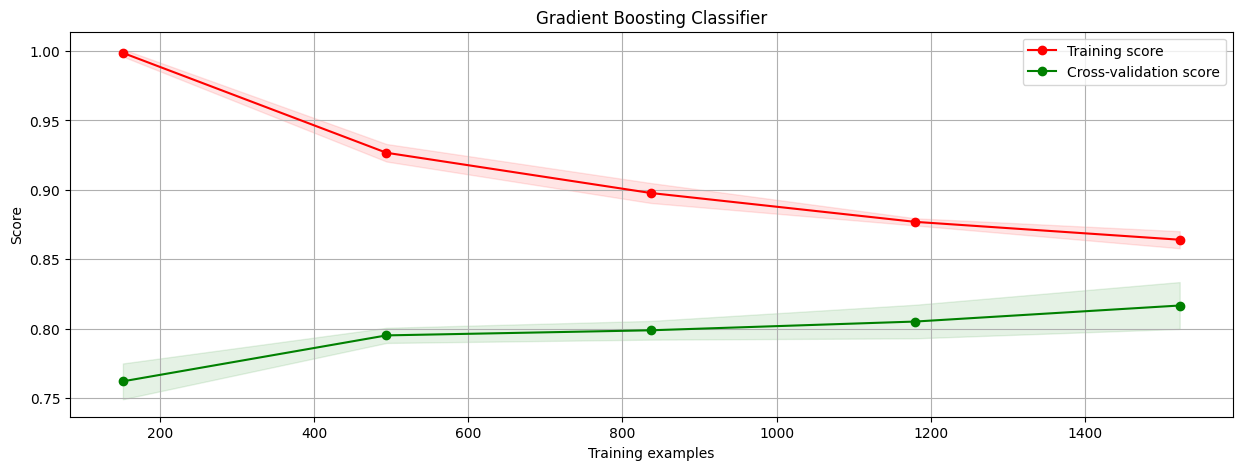

In [63]:
plot_learning_curve(gb_clf1, X_train_scaled, y_train, "Gradient Boosting Classifier")

In [64]:
print('Train Score : ', gb_clf1.score(X_train_scaled, y_train))
print('Test Score : ', gb_clf1.score(X_test_scaled, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*60)
print(classification_report(y_test, y_pred))
print('-'*60)
print('Confusion Matrix')
cm2 = (confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('-'*60)

Train Score :  0.8566176470588235
Test Score :  0.7651991614255765
Accuracy Score :  0.7651991614255765
ROC-AUC score test dataset:  0.7743879898135216
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.56      0.60       148
           1       0.81      0.86      0.83       329

    accuracy                           0.77       477
   macro avg       0.73      0.71      0.72       477
weighted avg       0.76      0.77      0.76       477

------------------------------------------------------------
Confusion Matrix
[[ 83  65]
 [ 47 282]]
------------------------------------------------------------


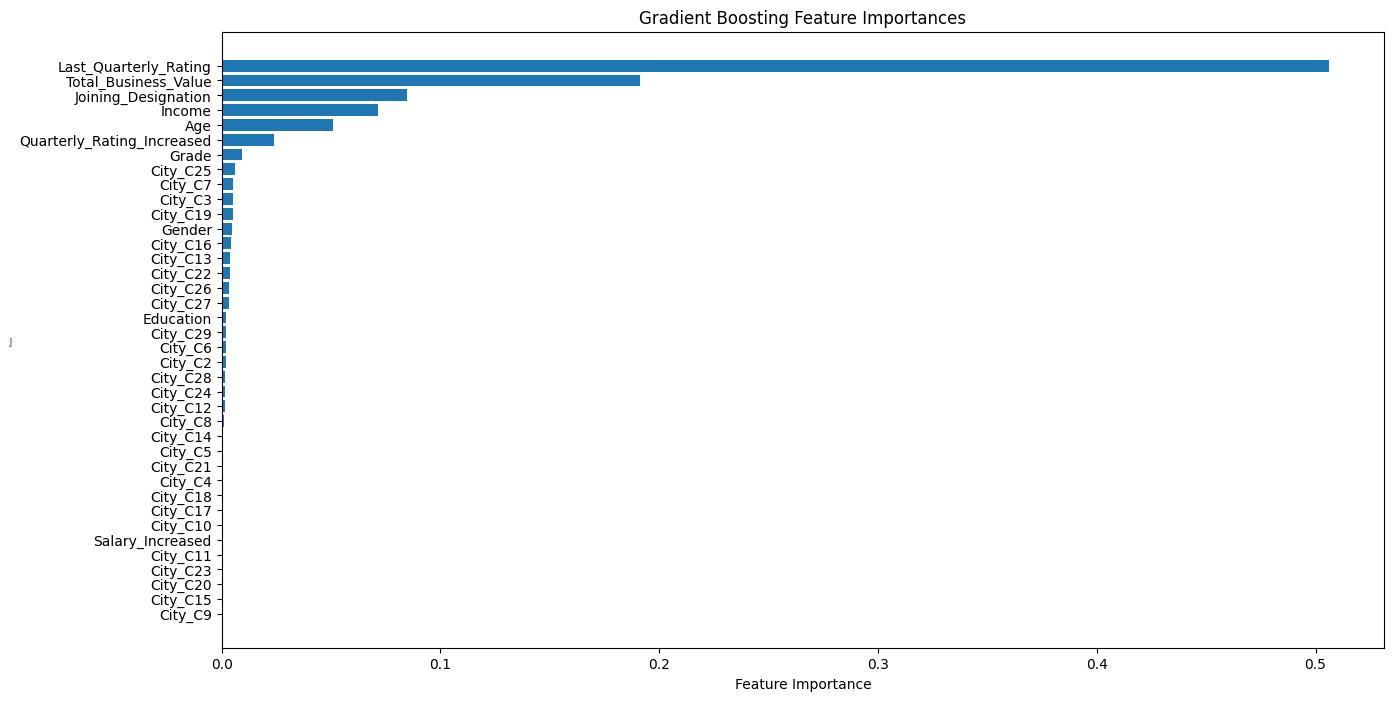

In [65]:
# feature importance
gb_clf1_imp1 = gb_clf1.feature_importances_

feature_names = [X_train.columns[i] for i in range(X_train_scaled.shape[1])]

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': gb_clf1_imp1})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature', size = 2)
plt.title('Gradient Boosting Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

## Treatment of Class Imbalance

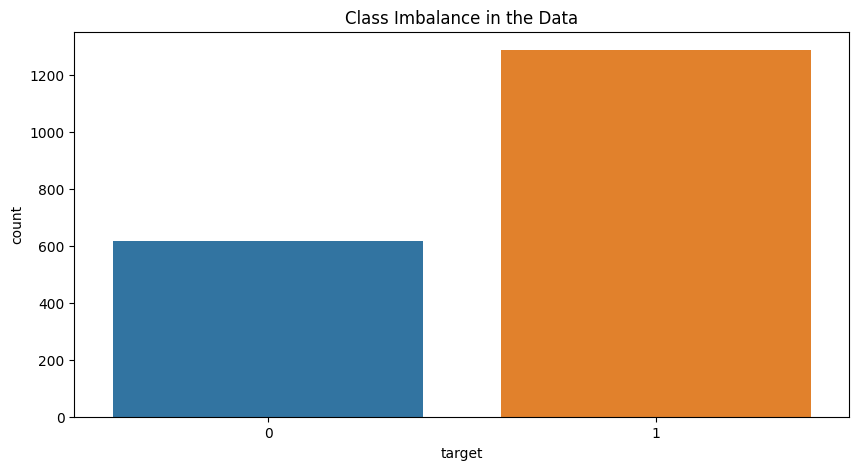

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x=y_train)
plt.title('Class Imbalance in the Data')
plt.show()

In [67]:
# percentage of two classes in the target column of trained data

(y_train.value_counts()*100)/len(y_train)

1    67.594538
0    32.405462
Name: target, dtype: float64

In [68]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_sm, y_train_sm = smt.fit_resample(X_train_scaled, y_train.ravel())

In [69]:
X_train_sm.shape, y_train_sm.shape

((2574, 38), (2574,))

In [70]:
X_test.shape, y_test.shape

((477, 38), (477,))

### AFTER THE TREATMENT OF CLASS IMBALANCE

## Ensemble Learning: Bagging

### Random Forest Classifier:

In [71]:
# param_grid = { 
#     'n_estimators':[50, 100, 150, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [2,3,4],
#     'criterion' :['gini', 'entropy']
# }

In [72]:
# from sklearn.model_selection import GridSearchCV

# model = RandomForestClassifier()
# clf = GridSearchCV(model, param_grid, cv=5, scoring='recall')
# clf.fit(X_train_sm, y_train_sm)

In [73]:
# clf.best_params_

In [74]:
rf_clf2 = RandomForestClassifier(criterion='gini', max_depth=4, max_features='auto', n_estimators=100)
rf_clf2.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=4, max_features='auto')

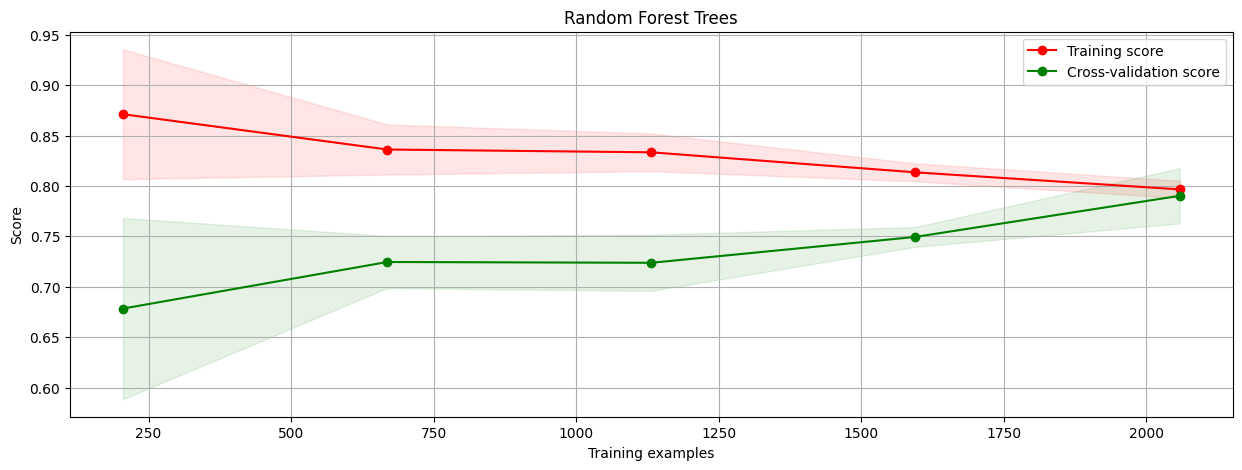

In [75]:
plot_learning_curve(rf_clf2, X_train_sm, y_train_sm, "Random Forest Trees")

In [76]:
y_pred = rf_clf2.predict(X_test_scaled)
proba = rf_clf2.predict_proba(X_test_scaled)[:,1]
print("Train data accuracy:",rf_clf2.score(X_train_sm, y_train_sm))
print("Test data accuracy:",rf_clf2.score(X_test_scaled,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*60)
print(classification_report(y_test, y_pred))
print('-'*60)

cm3 = (confusion_matrix(y_test, y_pred))
print('Confusion Metrix')
print(confusion_matrix(y_test, y_pred))

Train data accuracy: 0.789044289044289
Test data accuracy: 0.7756813417190775
Accuracy of the model: 0.7756813417190775
ROC-AUC score test dataset:  0.7825618171362853
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.57      0.61       148
           1       0.82      0.87      0.84       329

    accuracy                           0.78       477
   macro avg       0.74      0.72      0.73       477
weighted avg       0.77      0.78      0.77       477

------------------------------------------------------------
Confusion Metrix
[[ 85  63]
 [ 44 285]]


- **Out of all prediction, the measure for correctly predicted 0 is 66% and for 1 is 82% (Precision).**
- **Out of all actual 0, the measure for correctly predicted is 57% and for 1 is 87% (Recall).**

- **F1 Score of 0 is 61%.**
- **F1 Score of 1 is 84%.**

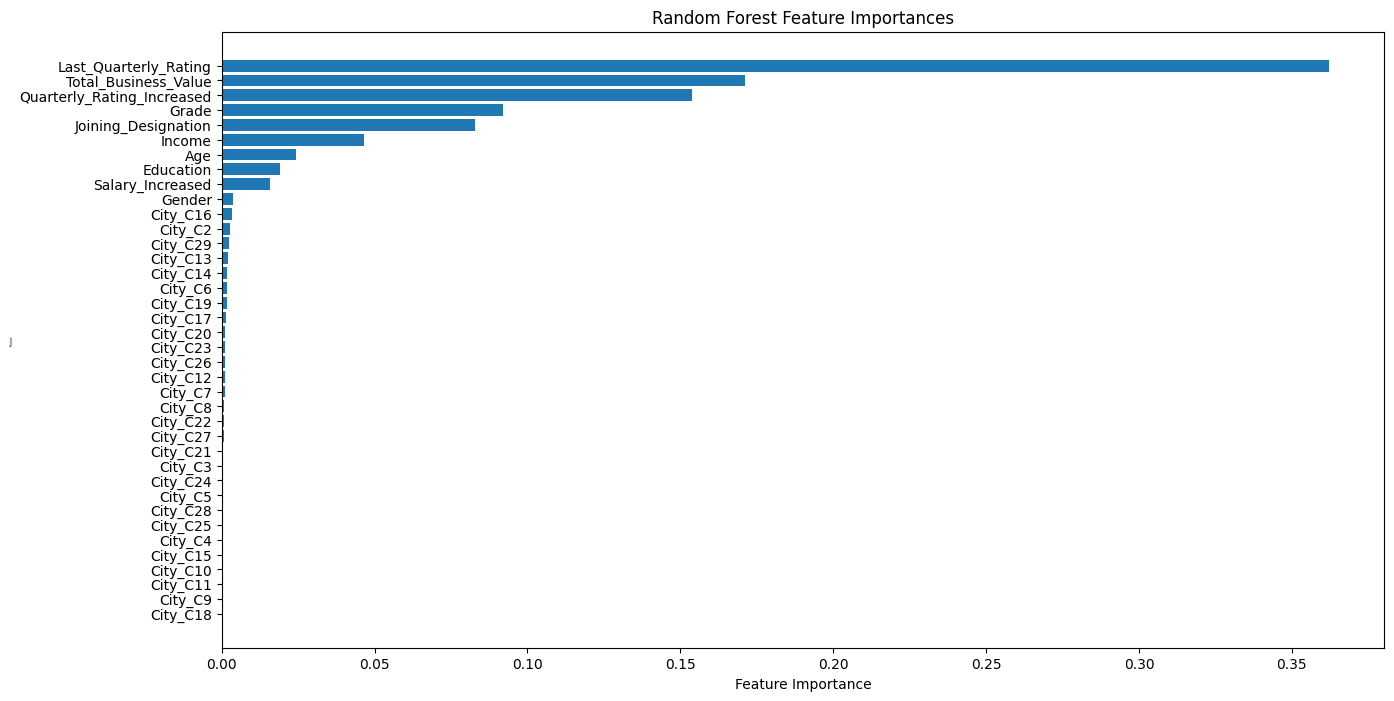

In [77]:
# feature importance
rf_clf2_imp2 = rf_clf2.feature_importances_

feature_names = [X_train.columns[i] for i in range(X_train_sm.shape[1])]

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_clf2_imp2})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature', size = 2)
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

- **City has almost no impact for driver churn.**

### ROC-AUC Curve

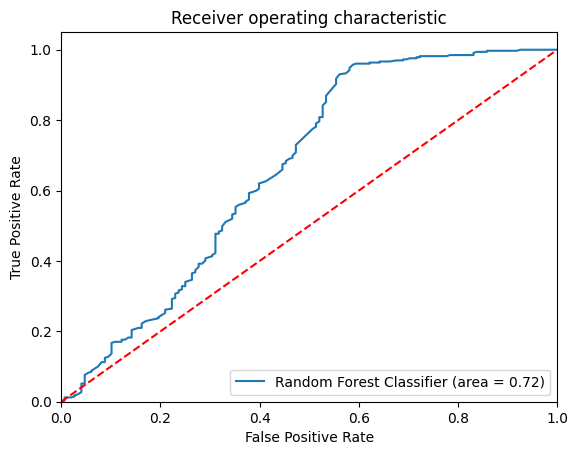

In [78]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,rf_clf2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Ensemble Learning: Boosting

### Gradient Boosting Classifier:

In [79]:
# param_grid = {
#     "max_depth": [2, 3, 4],
#     "loss": ["log_loss", "exponential"],
#     "subsample": [0.1, 0.2, 0.5, 0.8, 1],
#     "learning_rate": [0.1, 0.2, 0.3],
#     "n_estimators": [50,100,150,200]
# }

In [80]:
# model = GradientBoostingClassifier(random_state=42)

# gbc2 = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# gbc2.fit(X_train_sm, y_train_sm)

In [81]:
# gbc2.best_estimator_

In [82]:
gb_clf2 = GradientBoostingClassifier(loss='exponential', max_depth=2, n_estimators=200,
                           random_state=42, subsample=0.8)
gb_clf2.fit(X_train_sm, y_train_sm)

y_pred = gb_clf2.predict(X_test_scaled)
proba =gb_clf2.predict_proba(X_test_scaled)[:, 1]

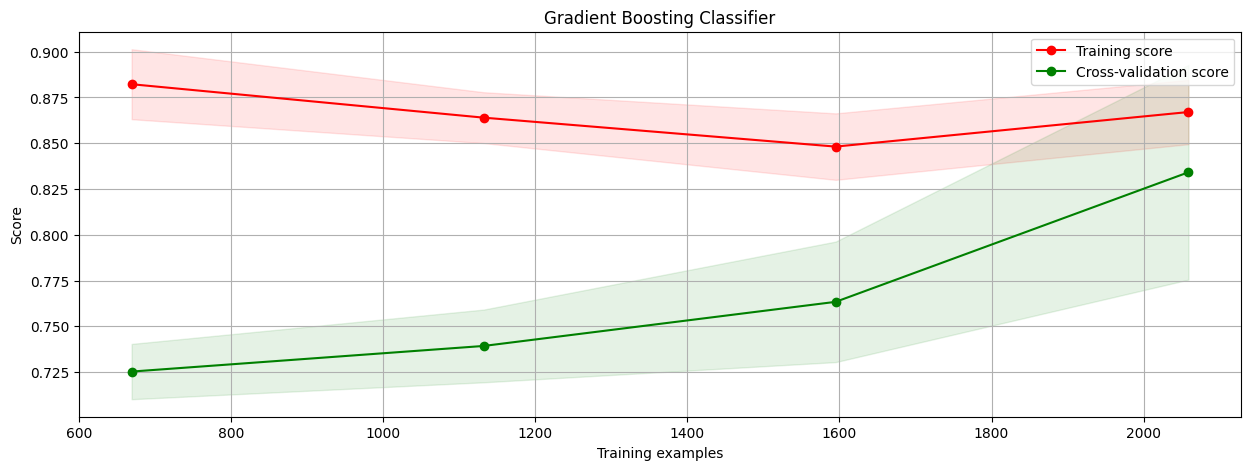

In [83]:
plot_learning_curve(gb_clf2, X_train_sm, y_train_sm, "Gradient Boosting Classifier")

In [84]:
print('Train Score : ', gb_clf2.score(X_train_sm, y_train_sm))
print('Test Score : ', gb_clf2.score(X_test_scaled, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*60)
print(classification_report(y_test, y_pred))
print('-'*60)
print('Confusion Matrix')
cm4 = (confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('-'*60)

Train Score :  0.8620823620823621
Test Score :  0.7672955974842768
Accuracy Score :  0.7672955974842768
ROC-AUC score test dataset:  0.7820175798899204
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       148
           1       0.82      0.85      0.83       329

    accuracy                           0.77       477
   macro avg       0.73      0.72      0.72       477
weighted avg       0.76      0.77      0.76       477

------------------------------------------------------------
Confusion Matrix
[[ 86  62]
 [ 49 280]]
------------------------------------------------------------


- **Out of all prediction, the measure for correctly predicted 0 is 64% and for 1 is 82% (Precision).**
- **Out of all actual 0, the measure for correctly predicted is 58% and for 1 is 85% (Recall).**

- **F1 Score of 0 is 61%.**
- **F1 Score of 1 is 83%.**

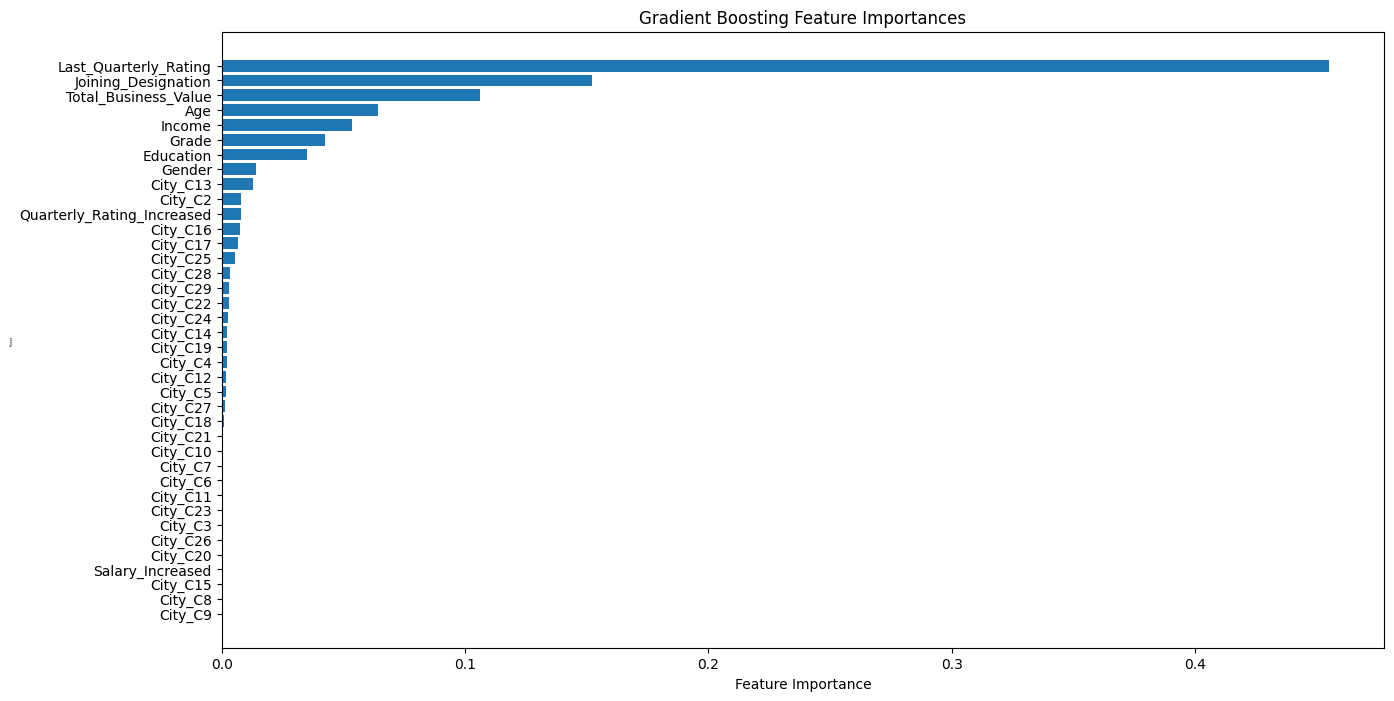

In [85]:
# feature importance
gb_clf2_imp2 = gb_clf2.feature_importances_

feature_names = [X_train.columns[i] for i in range(X_train_sm.shape[1])]

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': gb_clf2_imp2})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature', size = 2)
plt.title('Gradient Boosting Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

- **City has almost no impact for driver churn.**

### ROC-AUC Curve

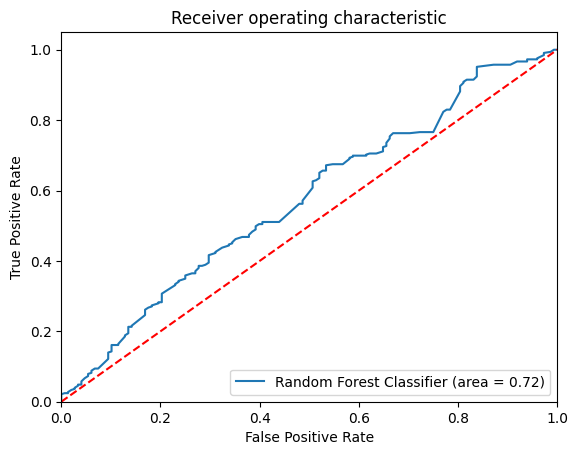

In [86]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,gb_clf2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculating Precision, Recall, and F1-Score for Multiple Models

In [87]:
# calculating precision, reall and f1_score for every model

tp1,fp1,fn1,tn1 =cm1[0][0],cm1[0][1],cm1[1][0],cm1[1][1]
tp2,fp2,fn2,tn2 =cm2[0][0],cm2[0][1],cm2[1][0],cm2[1][1]
tp3,fp3,fn3,tn3 =cm3[0][0],cm3[0][1],cm3[1][0],cm3[1][1]
tp4,fp4,fn4,tn4 =cm4[0][0],cm4[0][1],cm4[1][0],cm4[1][1]

precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
precision3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
precision4 = tp4/(tp4+fp4)
recall4 = tp4/(tp4+fn4)

f1_1 = (2*precision1*recall1)/(precision1+recall1)
f1_2 = (2*precision2*recall2)/(precision2+recall2)
f1_3 = (2*precision3*recall3)/(precision3+recall3)
f1_4 =(2*precision4*recall4)/(precision4+recall4)

In [88]:
score_df = pd.DataFrame({'Model':['RandomForest','GradientBoosting','RandomForest','GradientBoosting'],
                  'Class':['imbalanced','imbalanced','balanced','balanced'],
                  'True_pos':[tp1,tp2,tp3,tp4],
                  'Fal_pos':[fp1,fp2,fp3,fp4],
                  'Fal_neg':[fn1,fn2,fn3,fn4],
                  'True_neg':[tn1,tn2,tn3,tn4],
                  'F1_score%':[f1_1*100,f1_2*100,f1_3*100,f1_4*100],
                  'Precision%':[precision1*100,precision2*100,precision3*100,precision4*100],
                  'Recall%':[recall1*100,recall2*100,recall3*100,recall4*100]})

In [89]:
score_df

,Model,Class,True_pos,Fal_pos,Fal_neg,True_neg,F1_score%,Precision%,Recall%
0,RandomForest,imbalanced,55,93,13,316,50.925926,37.162162,80.882353
1,GradientBoosting,imbalanced,83,65,47,282,59.712230,56.081081,63.846154
2,RandomForest,balanced,85,63,44,285,61.371841,57.432432,65.891473
3,GradientBoosting,balanced,86,62,49,280,60.777385,58.108108,63.703704


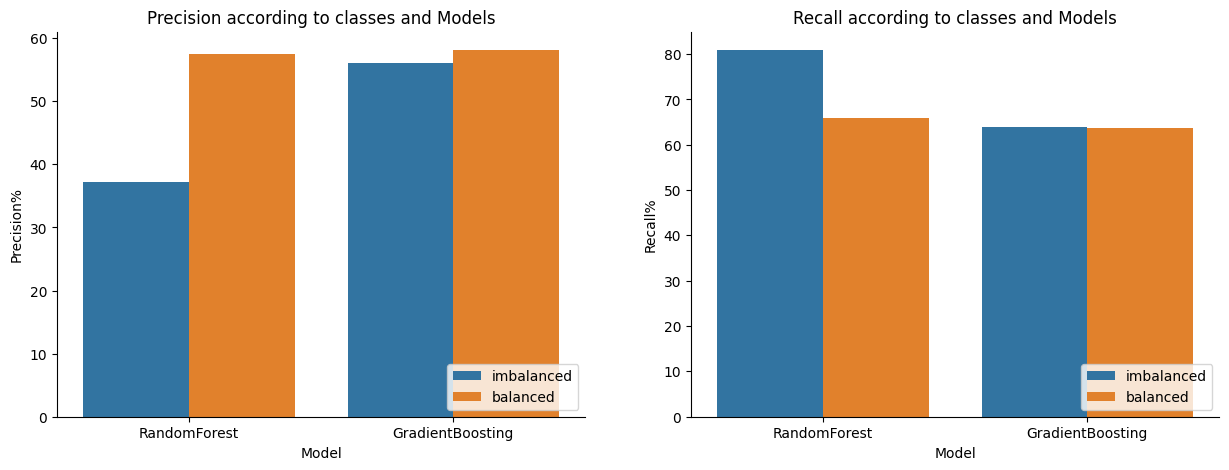

In [90]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x=score_df.Model,y=score_df['Precision%'],hue=score_df.Class)
plt.title('Precision according to classes and Models')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
sns.barplot(x=score_df.Model,y=score_df['Recall%'],hue=score_df.Class)
plt.title('Recall according to classes and Models')
plt.legend(loc='lower right')
sns.despine()

plt.show()

## Final Result:

- We observe that we are not getting very high recall on target 0 which may be due to small unbalanced dataset.
- Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).

- **We observe that Random Forest with SMOTE outperforms rest of the models and has higher recall and precision values.**
    - The Random Forest method out of all predicted 0 the measure of correctly predicted is 66%, and for 1 it is 82%(Precision).
    - The Random Forest method out of all actual 0 the measure of correctly predicted is 57%, and for 1 it is 87%(Recall).
    - The ROC-AUC curve area for Random Forest Classifier is 0.72.

- **Gradient Boosting Classifier Result:**
    - Out of all prediction, the measure for correctly predicted 0 is 64% and for 1 is 82% (Precision).
    - Out of all actual 0, the measure for correctly predicted is 58% and for 1 is 85% (Recall).
    - The ROC-AUC curve area for Gradient Boosting Decision Tree Classifier is 0.72.

# Actionable Insights and Recommendation

- Out of 2381 drivers 1616 have left the company.
- The proportion of Age, gender and education is more or less the same for both the employees who left the organization and those who did not leave.
- The employees who have their grade greater than 2 at the time of joining are less likely to leave the organization.
- The employees whose quarterly rating has increased are less likely to leave the organization.
- The employees whose monthly salary has not increased are more likely to leave the organization.

- We need to incentivise the drivers overtime or other perks to overcome churning.
- The employees whose quarterly rating has increased are less likely to leave the organization.
- Company needs to implement the reward system for the customer who provide the feedback and rate drivers
- The employees whose monthly salary has not increased are more likely to leave the organization.
- Company needs to get in touch with those drivers whose monthly salary has not increased and help them out to earn more by provider bonus and perks.
- Out of 2381 employees, 1744 employees had their last quarterly rating as 1.
- Out of 2381 employees, the quarterly rating has not increased for 2076 employees. This is red flag for the company which needs to regulate.
- Company needs to look why customers are not rating drivers.
- Last_Quarterly_Rating, Total_Business_Value & Quarterly_Rating_Increased are the most important features. Company needs to tracks these features as predicators.

- The Random Forest Classifier attains the Recall score of 87% for the driver who left the company. Which indicates that model is performing a decent job.